<a href="https://colab.research.google.com/github/lucguittard/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Luc_Guittard_Clustering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [147]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

In [148]:
# cleaning

df.dtypes
df.isna().sum()
df = df.drop('Unnamed: 32', axis = 1)
df.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## PCA / Cluster Prep

In [149]:

# Principal Component Analysis
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# define a matrix
data = df.values
print("Data: \n", data)

# Standardize the Data
# Instantiate a Standard Scaler object
scaler = StandardScaler()
# Use the object to fit_transform our data
Z = scaler.fit_transform(data)
print("\n Standardized Data: \n", data)

# create the PCA instance
pca = PCA(.90) #Hey PCA, pick the minimum no. of principle components that account for 90% of variance -> returns 8 PCs

# fit on data
pca.fit(Z)

#Count no. of principle components
print("\n No. of PCs: \n",pca.n_components_)

# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

# transform data
B = pca.transform(Z)
print(B.shape,"\n Projected Data: \n", B)

Data: 
 [[8.4230200e+05 1.7990000e+01 1.0380000e+01 ... 2.6540000e-01
  4.6010000e-01 1.1890000e-01]
 [8.4251700e+05 2.0570000e+01 1.7770000e+01 ... 1.8600000e-01
  2.7500000e-01 8.9020000e-02]
 [8.4300903e+07 1.9690000e+01 2.1250000e+01 ... 2.4300000e-01
  3.6130000e-01 8.7580000e-02]
 ...
 [9.2695400e+05 1.6600000e+01 2.8080000e+01 ... 1.4180000e-01
  2.2180000e-01 7.8200000e-02]
 [9.2724100e+05 2.0600000e+01 2.9330000e+01 ... 2.6500000e-01
  4.0870000e-01 1.2400000e-01]
 [9.2751000e+04 7.7600000e+00 2.4540000e+01 ... 0.0000000e+00
  2.8710000e-01 7.0390000e-02]]

 Standardized Data: 
 [[8.4230200e+05 1.7990000e+01 1.0380000e+01 ... 2.6540000e-01
  4.6010000e-01 1.1890000e-01]
 [8.4251700e+05 2.0570000e+01 1.7770000e+01 ... 1.8600000e-01
  2.7500000e-01 8.9020000e-02]
 [8.4300903e+07 1.9690000e+01 2.1250000e+01 ... 2.4300000e-01
  3.6130000e-01 8.7580000e-02]
 ...
 [9.2695400e+05 1.6600000e+01 2.8080000e+01 ... 1.4180000e-01
  2.2180000e-01 7.8200000e-02]
 [9.2724100e+05 2.0600000e+0

In [150]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


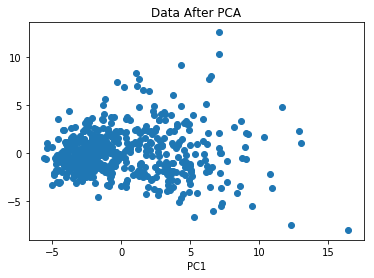

In [154]:
#plotting the projection 
x = B[:,0:1] 
y = B[:,1:2]
#print()
df2 = pd.DataFrame(x)
df3 = pd.DataFrame(y)

plt.scatter(df2, df3)
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.show()
#difficulty interpreting this; 1 potential linearly-seperable cluster 

In [0]:
# pca = PCA().fit(Z) #Z is standardized data matrix
# figure = plt.subplots(figsize = (10,10))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.grid(color='k', which='major', axis='both');

#appears to concur with quick method above - 8 PCs seems like a good number

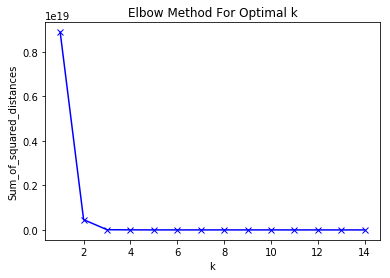

In [160]:
#Elbow Method of determining number of clusters/centroids
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show() 

# setting between three & eight categories if working with pc_df; 
#  three cats if working with df (sans label) 

## Clustering , lost - disregard this sxn

In [0]:
#Clustering: KMeans approach
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=1)  # one cluster suffices from analysis of plotted PCA projection
kmeans.fit(df)
labels = kmeans.labels_
new_series = pd.Series(labels)
df4 = df
df4['clusters'] = new_series.values
df4.head()

In [0]:
import math
import numpy as np
from scipy.spatial import distance

# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(pc_df, centroids, iteration):
 
  # calculate the distances between each point and each centroid
  distances = distance.cdist(pc_df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  pc_df['cluster_'+iteration] = se.values
  
  return pc_df

In [0]:
# points = df[['radius_mean', 'texture_mean','perimeter_mean', 'area_mean',
#             'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean']]
# points.head() #picking 8

In [0]:
pc_data = B  #principle component data optained from PCA
pc_df = pd.DataFrame(B, columns=["a", "b", "c", "d", "e", "f", "g", "h"])
pc_df.head()

In [0]:
centroids = pc_df.sample(1)
print(centroids.head())

first_pass = find_nearest_centroid(pc_df.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

In [0]:
pc_df.a

In [0]:
from scipy import spatial
def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice([0,1,2])] * df.shape[0]
  df_a = df.copy()
  i = 0
  
  while True:
    if i>0:
      centroids = get_centroids(df_a, 'cluster' + str(i-1))

    distances = spatial.distance.cdist(df_a[['a', 'b']], centroids[['a', 'b']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_a['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_a
    else:
      i +=1
      last_centroids = nearest_centroids
      
def get_centroids(df, column_header):
  x = [df.a[df[column_header]==0].mean(), df.a[df[column_header]==1].mean(), df.a[df[column_header]==2].mean()]
  y = [df.b[df[column_header]==0].mean(), df.b[df[column_header]==1].mean(), df.b[df[column_header]==2].mean()]
  data = {'a': a, 'b' : b}
  return pd.DataFrame(data)
  
  
find_nearest_centroid(pc_df, centroids).head()

In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].a, centroids.iloc[0].b, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', a='a', b='b', label=key, color=colors[key])
  plt.show()
  
plot_clusters(first_pass, 'cluster_1', centroids)

In [0]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(first_pass, 'cluster_1')

In [0]:
# Calculate New Centroids
centroids = get_centroids(first_pass, 'cluster_1')

# Get Clusters for New Centroids
second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

# Plot New Cluster
plot_clusters(second_pass, 'cluster_2', centroids)

## Use of sklearn.cluster.Kmeans and Practice
You want the centroids based on a specified number of clusters? We got it here, and in just three lines of perfectly marinated code.

In [163]:
pc_df.head()
print(B)

[[ 9.18319983  1.97127137 -1.17162471 ... -1.37228049  0.37184363
   2.18052922]
 [ 2.38329766 -3.75345877 -0.58022866 ... -0.12661612 -0.28826986
   0.04493484]
 [ 5.74247239 -1.08035048 -0.53308788 ... -0.401855    0.4631876
  -0.7152086 ]
 ...
 [ 1.2518901  -1.89397674  0.53446685 ...  0.39471327 -0.43780583
  -0.17866837]
 [10.36503528  1.69639755 -1.90741785 ... -0.65671962 -0.19526395
   0.27520221]
 [-5.47826365 -0.67278804  1.47716504 ... -1.57207609  0.60034041
   1.63559151]]


In [166]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(B)
kmeans.cluster_centers_

# I'm sorry.. so what was the holdup? Is this really all that's wanted? The cluster centers; the centroids..
# O how I feel emboldened

# Find output below, three centroids with the coordinates of their respective eighth-dimensional locations. 
#  

array([[-2.30457367e+00, -2.56926158e-01,  7.35271687e-02,
         4.26245439e-02, -2.92506254e-02, -5.22700176e-02,
         4.97783035e-03,  1.40573725e-02],
       [ 2.35114517e+00,  2.96310426e+00, -7.20188863e-01,
        -2.93613434e-01,  2.98880427e-01,  1.89113110e-01,
         8.75283977e-02, -4.33864096e-02],
       [ 5.34156103e+00, -1.88449060e+00,  4.21966807e-01,
         1.30867001e-01, -1.79229084e-01, -3.52507079e-03,
        -9.65675585e-02, -5.91374521e-03]])

So tell me Johnny, what's the big take-away?
All we got are three locations in a higher-dimensional space. How do we interpret that? 
Well Moris, I ain't too sure, but I think what we have here, is a fail.. a failure...
No, a *group* of clusters. 

In all seriousness, these clusters/groupings of datapoints should *explain* different observed outputs (the y vars). In this case, the y-vars or labels column is that attribute of the original imported df titled 'diagnosis'. How odd it is, if there are indeed only two possible outputs, that there would be needed three or more eighth-dimensional clusters. 

In [0]:
# from sklearn.preprocessing import StandardScaler  -> Rudy! Thanks for the help and sharing your methods
# scaler = StandardScaler()

# scaler.fit(df)
# scaled_data = scaler.transform(df)
# pca = PCA(n_components=2)
# pca.fit(scaled_data)
# x_pca = pca.transform(scaled_data)

# plt.figure(figsize=(8,6))
# plt.scatter(x_pca[:,0], x_pca[:,1])
# plt.xlabel('First Principle Component')
# plt.ylabel('Second Principle Component')
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(x_pca)  

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.